### Import Libraries and Modules

In [1]:
from preprocess_data import generator
import matplotlib.pyplot as plt

### Import Dataset

In [2]:
train_generator = generator('./assets/food-dataset')
no_of_classes = len(train_generator.class_indices)

Found 283 images belonging to 7 classes.


### Define Model

In [3]:
from model import buildmodel

model = buildmodel(no_of_classes)

Using TensorFlow backend.
/home/adirtha/Documents/Projects/FindMyFood/model.py:27: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  model = Model(input=base_model.input, output=pred)


In [4]:
model.fit_generator(train_generator, steps_per_epoch=len(train_generator)/64, epochs=10)

### Save & Load Model

In [5]:
from keras.models import load_model

model.save('model.h5')

# model = load_model('model.h5')

### Make Prediction on a Sample Image

In [6]:
label_map = (train_generator.class_indices)
print(label_map)

{'dal': 0, 'french_fries': 1, 'grilled_chicken': 2, 'noodles': 3, 'pizza': 4, 'rice': 5, 'roti': 6}


Text(0.5, 1.0, 'Prediction: roti')

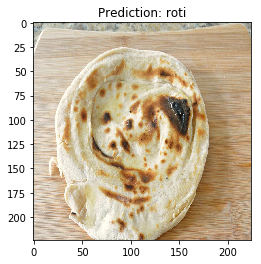

In [8]:
from model import predict

img_path = './assets/demo-image/test2.jpg'
pred_index, img_array = predict(model, img_path)

plt.imshow(img_array/255.)
plt.title('Prediction: ' + list(label_map.keys())[list(label_map.values()).index(pred_index)])